In [3]:
import requests
from PIL import Image, ImageDraw, ImageFont
import torch
from transformers import AutoProcessor, OwlViTForObjectDetection
import matplotlib.pyplot as plt

# Load the model and processor
processor = AutoProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")


[{'scores': tensor([], grad_fn=<IndexBackward0>), 'labels': tensor([], dtype=torch.int64), 'boxes': tensor([], size=(0, 4), grad_fn=<IndexBackward0>)}]


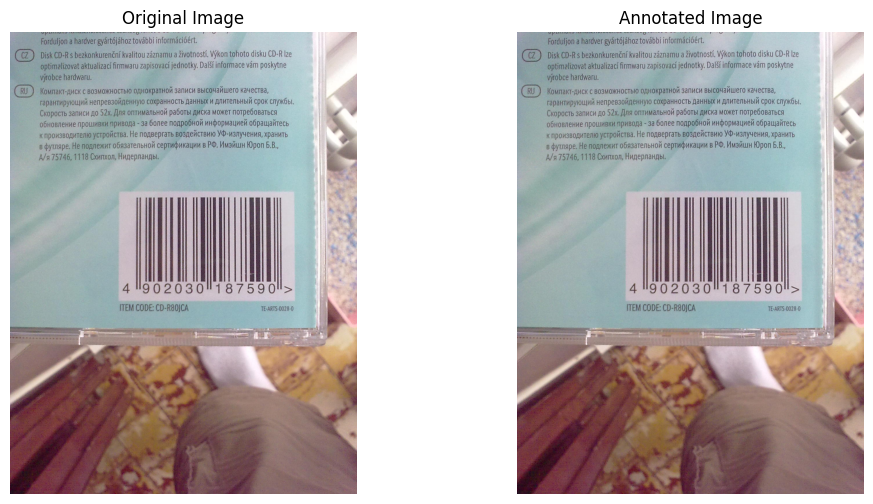

In [2]:
import requests
from PIL import Image, ImageDraw, ImageFont
import torch
from transformers import AutoProcessor, OwlViTForObjectDetection
import matplotlib.pyplot as plt

# Load the model and processor
processor = AutoProcessor.from_pretrained("google/owlvit-base-patch32")
model = OwlViTForObjectDetection.from_pretrained("google/owlvit-base-patch32")

# Load the image
url = "/Users/sanchitjalan/Desktop/5th_sem/DIP/DIP_Project/BarcodeDatasets/Dataset1/05102009083.jpg"
image = Image.open(url)

# Define text queries
text = "a barcode."

# Preprocess inputs
inputs = processor(text=text, images=image, return_tensors="pt")
outputs = model(**inputs)

# Target image sizes (height, width) to rescale box predictions [batch_size, 2]
target_sizes = torch.Tensor([image.size[::-1]])
results = processor.post_process_object_detection(
    outputs=outputs, threshold=0.1, target_sizes=target_sizes
)
print(results)

# Retrieve predictions for the first image
i = 0
boxes, scores, labels = results[i]["boxes"], results[i]["scores"], results[i]["labels"]

# Annotate the image with the predictions
annotated_image = image.copy()
draw = ImageDraw.Draw(annotated_image)
font = ImageFont.load_default()

for box, score, label in zip(boxes, scores, labels):
    box = [round(i, 2) for i in box.tolist()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]), f"{text[label]}: {round(score.item(), 2)}", fill="red", font=font)

# Display the original and annotated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Annotated Image")
plt.imshow(annotated_image)
plt.axis("off")

plt.show()
